In [1]:
import os
import sys
import numpy as np
import librosa
from scipy.io import wavfile
from statsmodels.tools import categorical
import matplotlib.pyplot as plt

In [2]:
nb_classes = 30

In [3]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield start, start + window_size
        start += (window_size / 2)

In [40]:
def extract_features(path):

    features = np.array([], dtype='float32')

    files = [file for file in os.listdir(path)]
    label = ["" for x in range(len(files))]
    
    i=0
    count=0
    print(os.path.basename(path))
    for file_name in files:

        unit = os.path.join(path,(str)(file_name))
        sample,sample_rate = librosa.load(unit)
        
        name = file_name 
        label[i] = name
        i=i+1
        print((str)(i)+" files done.")

        mfccs = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=39)     #frames (n_mfcc, track duration=600 all audio duration assuming)
        mfccs = librosa.feature.delta(mfccs)
        mfccs = np.transpose(mfccs) # ( frames, 39 )                                 
        mfccs = np.lib.pad(mfccs,((0,600-mfccs.shape[0]),(0,0)), mode = 'constant', constant_values=0) # ( 600, 39 )
        mfccs = mfccs[np.newaxis, :, :]

        if count==0:
            features = mfccs
            count = 1
        else:
            features = np.vstack((features, mfccs)) # ( number of files, frames=600, 26 )

    return np.array(features), np.asarray(label)


In [41]:
def one_hot_encode(labels):
    labels = categorical(labels, drop=True)
    return labels


In [42]:
tr_features,tr_labels = extract_features("./train_set")

train_set
1 files done.
2 files done.
3 files done.
4 files done.
5 files done.
6 files done.
7 files done.
8 files done.
9 files done.
10 files done.
11 files done.
12 files done.
13 files done.
14 files done.
15 files done.
16 files done.
17 files done.
18 files done.
19 files done.
20 files done.
21 files done.
22 files done.
23 files done.
24 files done.
25 files done.
26 files done.
27 files done.
28 files done.
29 files done.
30 files done.
31 files done.
32 files done.
33 files done.
34 files done.
35 files done.
36 files done.
37 files done.
38 files done.
39 files done.
40 files done.
41 files done.
42 files done.
43 files done.
44 files done.
45 files done.
46 files done.
47 files done.
48 files done.
49 files done.
50 files done.
51 files done.
52 files done.
53 files done.
54 files done.
55 files done.
56 files done.
57 files done.
58 files done.
59 files done.
60 files done.
61 files done.
62 files done.
63 files done.
64 files done.
65 files done.
66 files done.
67 files 

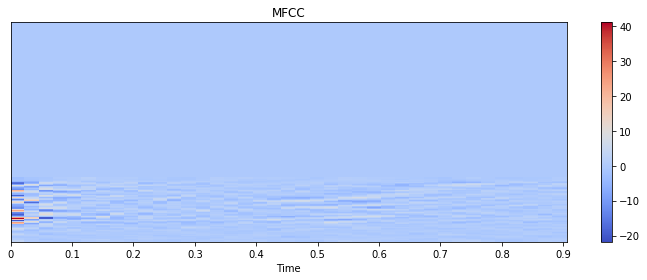

In [44]:
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(tr_features[100], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [45]:
tr_labels = one_hot_encode(tr_labels)

In [46]:
#np.save('train_features_rnn', tr_features)
#print('rnn features saved: ',tr_features.shape)
#np.save('train_labels_rnn', tr_labels)
#print('labels saved: ',tr_labels.shape)

In [47]:
ts_features,ts_labels = extract_features("./test_set")
ts_labels = one_hot_encode(ts_labels)

test_set
1 files done.
2 files done.
3 files done.
4 files done.
5 files done.
6 files done.
7 files done.
8 files done.
9 files done.
10 files done.
11 files done.
12 files done.
13 files done.
14 files done.
15 files done.
16 files done.
17 files done.
18 files done.
19 files done.
20 files done.
21 files done.
22 files done.
23 files done.
24 files done.
25 files done.
26 files done.
27 files done.
28 files done.
29 files done.
30 files done.
31 files done.
32 files done.
33 files done.
34 files done.
35 files done.
36 files done.
37 files done.
38 files done.
39 files done.
40 files done.
41 files done.
42 files done.
43 files done.
44 files done.
45 files done.
46 files done.
47 files done.
48 files done.
49 files done.
50 files done.
51 files done.
52 files done.
53 files done.
54 files done.
55 files done.
56 files done.
57 files done.
58 files done.
59 files done.
60 files done.
61 files done.
62 files done.
63 files done.
64 files done.
65 files done.
66 files done.
67 files d

In [ ]:
#Random display of mfcc features from test audio data

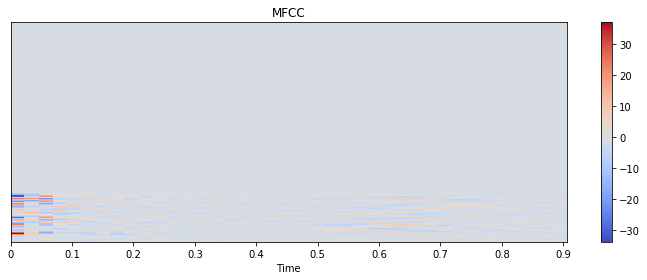

In [48]:
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(ts_features[150], x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [49]:
#np.save('test_features_rnn', ts_features)
#print('rnn features saved: ', ts_features.shape)
#np.save('test_labels_rnn', ts_labels)
#print('rnn labels saved: ', ts_labels.shape)

In [50]:
test_X = ts_features
print("Test Features: ",test_X.shape)
test_Y = ts_labels
print("Test Labels: ",test_Y.shape)
train_X = tr_features
print("Train Features: ",train_X.shape)
train_Y = tr_labels
print("Train Labels: ",train_Y.shape)
#sys.exit()

Test Features:  (199, 600, 39)
Test Labels:  (199, 199)
Train Features:  (300, 600, 39)
Train Labels:  (300, 300)


#How to integrate the mfcc features into hmm???????